# A point

We covered zero. Let's look at a single point, or coordinate in n-dimensional space.

Let's start with a 1D space. This is a number-line.

A point is a value that is represented on the line (or indeed somewhere in the mathematical *space* we are using). It can be anywhere...positive, negative or zero.

But computers have finite capability and typically don't have a way to represent numbers approaching plus or minus infinity.

Python does, however have integer representation that is limited only by available memory.

A point has no length or volume.

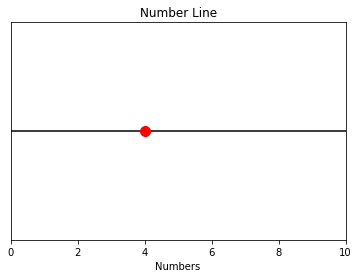

In [2]:
import matplotlib.pyplot as plt

x = 4

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
# Drawing a horizontal line for the number line
plt.axhline(y=0, color='k')
# Adding a red dot at x = 4
plt.plot(x, 0, marker='o', markersize=10, color='red')
plt.xlabel('Numbers')
plt.title('Number Line')
# Removing y-axis ticks
ax.set_yticks([])
plt.show()

# Scatter plots
We can make a scatter-plot on the number line to visualise the floating point elements of a row vector.

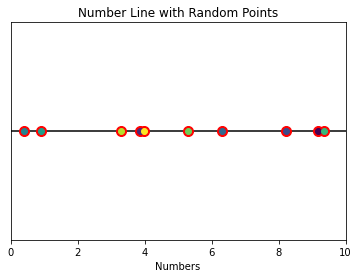

In [6]:
import numpy as np
import matplotlib.pyplot as plt

colors = plt.cm.viridis(np.linspace(0, 1, 10))  # linspace is making 10 evenly spaced values

# Generate a 10-element row vector with random values between 0 and 10
random_values = np.random.uniform(0, 10, 10)

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

plt.axhline(y=0, color='k')
plt.plot(random_values, np.zeros(10), 'o', markersize=10, color='red')

# Plotting the points on the number line, each with a different color
for i in range(len(random_values)):
    plt.plot(random_values[i], 0, 'o', color=colors[i])
    
# Adding labels and title
plt.xlabel('Numbers')
plt.title('Number Line with Random Points')

ax.set_yticks([])
plt.show()

### Why do this?
Each value might be derived by analysing something quite complex. For example, a score used to guess the future sale price of a house, or a value that somehow represents a word in some chosen language. Each of these dots represents what we call a 'feature' and putting them into the number line like this is called 'embedding' or 'vectorizing'

Each of the dots in the plot above could also be represented by a horizontal vector where the direction is always to the right at zero degrees angle, and the magnitude (length) is the distance from x=0 to the tip of the arrow.

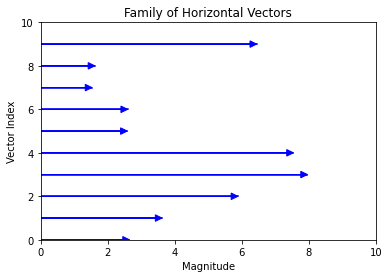

In [8]:
fig, ax = plt.subplots()

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Generating 10 number lines with arrows pointing to the randomly chosen points
for i in range(10):
    random_point = np.random.uniform(0, 10)
    ax.plot([0, random_point], [i, i], color='blue')  # Horizontal line
    ax.arrow(0, i, random_point - 0.2, 0, head_width=0.3, head_length=0.2, fc='blue', ec='blue')

plt.xlabel('Magnitude')
plt.ylabel('Vector Index')
plt.title('Family of Horizontal Vectors')

plt.show()

# Normalisation

numpy lets us take a row vector like this and squeeze it all into the range 0 to 1.0. This is called normalisation. You can also consider the normalised values to be percentages of the highest value in the row vector. 

We imght want to do this when combining several row vectors (features) for further analysis so that the relative importance of the values are treated fairly. It would not make sense to combine salary for one feature with people's height in cm unless we squeeze these into a normalised scale.

As always, an example is useful. Let's take two feature sets and plot them as points first without normalising, then with normalising.

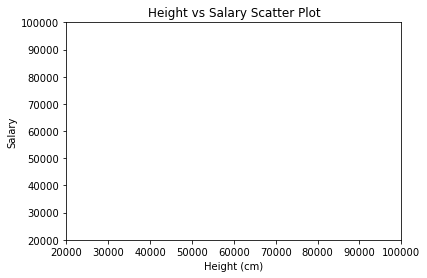

In [72]:
# Generating a 10-element vector for typical human heights in cm
heights = np.random.uniform(150, 200, 10)  # Heights ranging from 150cm to 200cm

# Generating a 10-element vector for typical yearly salaries (in a general currency unit)
salary = np.random.uniform(20000, 100000, 10)  # Salaries ranging from 20,000 to 100,000
plt.ylim(20000, 100000)  # Setting the y-axis limits to match the salary range
plt.xlim(20000, 100000)  # Setting the x-axis limits the same as the y range

# Creating a scatter plot of heights vs salary
plt.scatter(heights, salary)

# Adding labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Salary')
plt.title('Height vs Salary Scatter Plot')

# Showing the plot
plt.show()



### Dude. Where's my data?
It's there. It's all sqished onto the y-axis. Let's normalise the data and plot again.

In [11]:
salary = np.interp(salary, (salary.min(), salary.max()), (0, 1))
heights = np.interp(heights, (heights.min(), heights.max()), (0, 1))

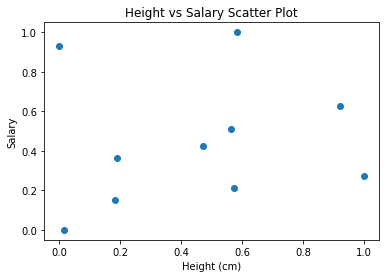

In [12]:
plt.scatter(heights, salary)

# Adding labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Salary')
plt.title('Height vs Salary Scatter Plot')

# Showing the plot
plt.show()


Now we can visualise the points and posit whether there might be a correlation between human height and salary.

In this case, there is not. There should not be and relationship in this data because the data was generated using a random uniform method.

# Some real-world data
Let's get some real data from this resource:
https://archive.ics.uci.edu/datasets

In [52]:
url = 'https://archive.ics.uci.edu/static/public/2/adult.zip'
columns = ['age', 'workclass', 'fnlwgt', 'education', 
           'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', '?1', '?2', '?3', 'country', 'salary']
desired_columns = ['']

In [55]:
import requests
import zipfile
import pandas as pd
import io

# Send a GET request to the URL
response = requests.get(url)

# Make sure the request was successful
if response.status_code == 200:
    # Open the ZIP file in memory
    zipfile_obj = zipfile.ZipFile(io.BytesIO(response.content))
    
    # Extract the name of the first file in the ZIP
    file_name = zipfile_obj.namelist()[0]
    # Open the extracted file
    with zipfile_obj.open(file_name) as file:
        print(zipfile_obj.namelist())
        with zipfile_obj.open('adult.data') as adult_data:
            df = pd.read_csv(adult_data, header=None, names=columns)
        #df = pd.read_csv(file)
else:
    print("Failed to retrieve the data")

opened
{file_name =}
['Index', 'adult.data', 'adult.names', 'adult.test', 'old.adult.names']


Let's drop some columns

In [61]:
df = df.drop(['race', 'sex', '?1', '?2', '?3'], axis=1)

In [62]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Cuba,<=50K


* In the context of a census income dataset, *"fnlwgt"* stands for "final weight." The term is commonly used in survey datasets and refers to a statistical weight assigned to each respondent. It represents how many people in the population are represented by each sample point in the dataset. Here's a bit more context:

* Purpose of Final Weight (fnlwgt): In survey sampling, each respondent might not represent just themselves but rather a larger number of people. This is particularly true in stratified sampling designs where some groups are over- or under-sampled relative to their actual proportion in the population. The "final weight" corrects for this and adjusts the results to be more representative of the entire population.

* Use in Analysis: When analyzing survey data, it's crucial to consider these weights, as they ensure that the results are representative of the population as a whole. For example, in calculating averages or other statistical measures, each respondent's data would be weighted by their "fnlwgt" value.

We can pull columns from the dataframe and plot them on a scatter plot. Let's get age and education-numb since these are already digits.

In [65]:
age = df['age']
education_number = df['education-num']

In census data the education-num is the nunmber of completed years of an individual's education.

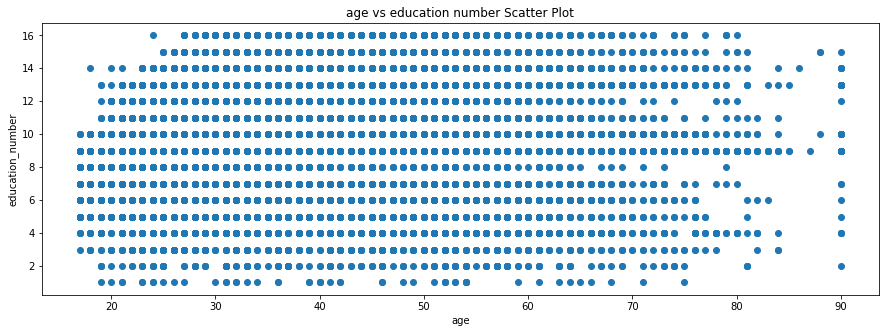

In [78]:
plt.figure(figsize=(15, 5))
plt.scatter(age, education_number)

plt.xlabel('age')
plt.ylabel('education_number')
plt.title('age vs education number Scatter Plot')
# Showing the plot
plt.show()

Now we can't readily read this scatter plot because every point conveys equal weight. There's a point for almost every combination of age and education number. So to get more insight, we need to add another dimension to the plot in the form of a color gradient that is darker for groups of points that are on top of each other. In the plot above, we can't see that many 20 year olds typically have 10 years of education as we would expect.

The hexbin plot reveals more structure in the data.

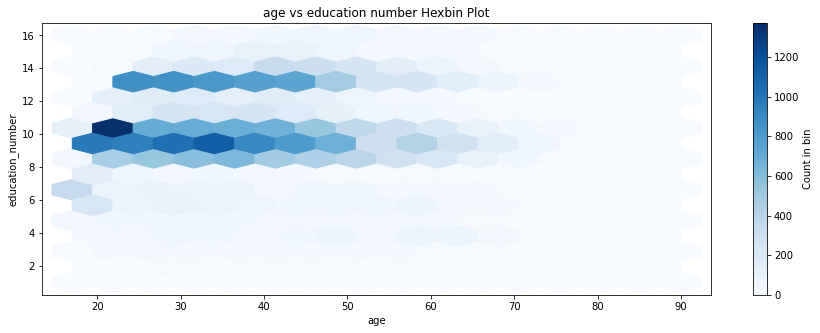

In [84]:
plt.figure(figsize=(15, 5))
plt.hexbin(age, education_number, gridsize=15, cmap='Blues')
# Adding a color bar
plt.colorbar(label='Count in bin')

plt.xlabel('age')
plt.ylabel('education_number')
plt.title('age vs education number Hexbin Plot')
# Showing the plot
plt.show()

This might not be the best way to represent the data in this case, but it does give some insight.

Let's revisit *fnlwgt* which is already a weight proportional to the number of respondants in the data set for each row.

How about getting an idea about the *distribution* of fnlwgt? Are they distributed evenly? Are there outliers? Are the responses dominated by a few rows?

To do this, we can plot the *fnlwgt points* in a distribution.

In [91]:
fnlwgts = df['fnlwgt'].sort_values(ascending=False)

In [92]:
fnlwgts

14449    1484705
18138    1455435
16739    1366120
15569    1268339
8258     1226583
          ...   
10826      19214
24012      18827
25743      14878
27207      13769
17096      12285
Name: fnlwgt, Length: 32561, dtype: int64

For a different flavor, we will use seaborn which is built on top of matplotlib.

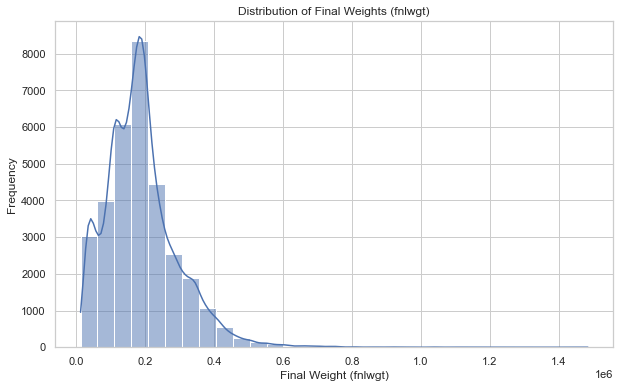

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the distribution plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(fnlwgts, kde=True, bins=30)

plt.xlabel('Final Weight (fnlwgt)')
plt.ylabel('Frequency')
plt.title('Distribution of Final Weights (fnlwgt)')

plt.show()


The distribution is quite typical for data gathered by sampling a large population. It looks vaguely like a Gaussian plot (a so-called *normal distribution*)

However it has a long tail. We can see there are many rows in the data that are represented by a Final Weight above 0.6e6 = 600,000.

The most common Final Weights are near 20,000.

The long tail skews the distribution. 

Let's calculate the mean and plot it on the graph.

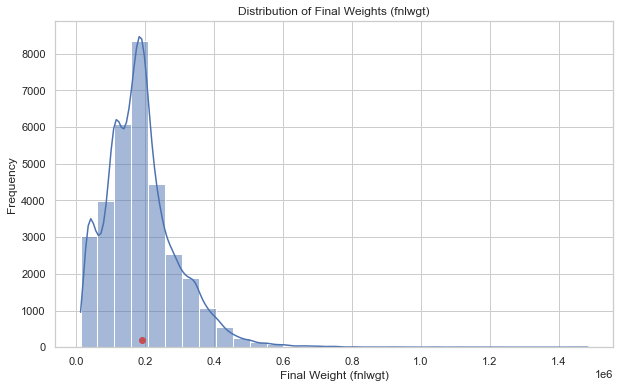

In [102]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(fnlwgts, kde=True, bins=30)

plt.xlabel('Final Weight (fnlwgt)')
plt.ylabel('Frequency')
plt.title('Distribution of Final Weights (fnlwgt)')
average_fnlwgt = np.mean(fnlwgts)
plt.plot(average_fnlwgt, 200, 'ro')  # 200 places the dot above the line
plt.show()

With pandas, we can get to a summary of the numeic values of the dataframe very easily:

In [98]:
df.describe()

,age,fnlwgt,education-num
count,32561.000000,3.256100e+04,32561.000000
mean,38.581647,1.897784e+05,10.080679
std,13.640433,1.055500e+05,2.572720
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.178270e+05,9.000000
50%,37.000000,1.783560e+05,10.000000
75%,48.000000,2.370510e+05,12.000000
max,90.000000,1.484705e+06,16.000000
